# LAB | Hyperparameter Tuning

**Load the data**

Finally step in order to maximize the performance on your Spaceship Titanic model.

The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

So far we've been training and evaluating models with default values for hyperparameters.

Today we will perform the same feature engineering as before, and then compare the best working models you got so far, but now fine tuning it's hyperparameters.

In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Now perform the same as before:
- Feature Scaling
- Feature Selection


In [3]:
spaceship.isnull().sum() 

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [4]:
spaceship_clean = spaceship.dropna() 

In [5]:
spaceship_clean.isnull().sum() 

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [6]:
spaceship_clean = spaceship_clean.copy()
spaceship_clean['Cabin'] = spaceship_clean['Cabin'].str.split('/').str[0]

In [7]:
spaceship_clean.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [8]:
spaceship_clean = spaceship_clean.drop(columns=['PassengerId','Name'])
spaceship_clean 

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [9]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(spaceship_clean[num_cols])

# Convert back to DataFrame for readability
X_scaled_df = pd.DataFrame(X_scaled, columns=num_cols)


In [10]:
pd.DataFrame({
    "feature": num_cols,
    "mean_": scaler.mean_,
    "scale_": scaler.scale_})

,feature,mean_,scale_
0,Age,28.894036,14.532329
1,RoomService,222.991674,644.939116
2,FoodCourt,478.958523,1678.465235
3,ShoppingMall,178.356494,576.284784
4,Spa,313.161520,1143.929699
5,VRDeck,303.780048,1127.056851


In [11]:
original = spaceship_clean.loc[0, 'RoomService']
scaled = X_scaled_df.loc[0, 'RoomService']

manual_z = (original - scaler.mean_[num_cols.index('RoomService')]) / scaler.scale_[num_cols.index('RoomService')]
print(f"Manual z-score: {manual_z:.4f}, Scaled value: {scaled:.4f}")

Manual z-score: -0.3458, Scaled value: -0.3458


<Axes: title={'center': 'Feature Importance'}>

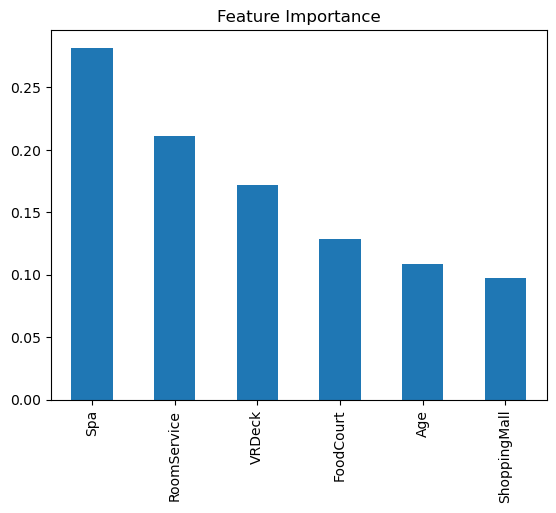

In [12]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

X = X_scaled_df
y = spaceship_clean['Transported']

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X, y)

# Feature importance scores
importances = pd.Series(tree.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', title='Feature Importance')

In [13]:
from scipy.stats import pointbiserialr

for col in X.columns:
    corr, _ = pointbiserialr(spaceship_clean[col], spaceship_clean['Transported'])
    print(f"{col}: {corr:.3f}")

Age: -0.083
RoomService: -0.247
FoodCourt: 0.055
ShoppingMall: 0.012
Spa: -0.220
VRDeck: -0.208


In [14]:
X = spaceship_clean[['RoomService', 'Spa', 'VRDeck', 'Age']]

y = spaceship_clean['Transported']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

- Now let's use the best model we got so far in order to see how it can improve when we fine tune it's hyperparameters.

In [17]:
#The best model is Gradient Boosting 

from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb.fit(X_train_scaled, y_train)
gb_score = gb.score(X_test_scaled, y_test)

print("Gradient Boosting accuracy:", gb_score)


Gradient Boosting accuracy: 0.754160363086233


- Evaluate your model

In [18]:
from sklearn.metrics import classification_report

y_pred = gb.predict(X_test_scaled)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

       False       0.78      0.70      0.74       656
        True       0.73      0.81      0.77       666

    accuracy                           0.75      1322
   macro avg       0.76      0.75      0.75      1322
weighted avg       0.76      0.75      0.75      1322



**Grid/Random Search**

For this lab we will use Grid Search.

- Define hyperparameters to fine tune.

In [19]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.1, 0.05, 0.01],
    "max_depth": [2, 3, 4],
    "subsample": [1.0, 0.8],
    "min_samples_split": [2, 5],}


- Run Grid Search

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [2, 3, 4], 'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [1.0, 0.8]},
             scoring='accuracy', verbose=1)

In [21]:
print(grid_search.best_params_)
print(grid_search.best_score_)


{'learning_rate': 0.05, 'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}
0.775929768355265


- Evaluate your model

In [22]:
best_gb = grid_search.best_estimator_
test_accuracy = best_gb.score(X_test_scaled, y_test)
print("Test accuracy:", test_accuracy)


Test accuracy: 0.7571860816944024


In [ ]:
# The model improved a little bit, from 0.754160363086233 to 0.7571860816944024 in the new test accuracy. 